<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#神经网络就是一个个函数运算" data-toc-modified-id="神经网络就是一个个函数运算-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>神经网络就是一个个函数运算</a></span><ul class="toc-item"><li><span><a href="#1个epoch" data-toc-modified-id="1个epoch-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1个epoch</a></span><ul class="toc-item"><li><span><a href="#正向传递-forward" data-toc-modified-id="正向传递-forward-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>正向传递 forward</a></span></li><li><span><a href="#反向传递-backward" data-toc-modified-id="反向传递-backward-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>反向传递 backward</a></span></li></ul></li><li><span><a href="#传递图示" data-toc-modified-id="传递图示-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>传递图示</a></span></li><li><span><a href="#Python从0到1实现神经网络" data-toc-modified-id="Python从0到1实现神经网络-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Python从0到1实现神经网络</a></span></li><li><span><a href="#使用波士顿房价数据测试" data-toc-modified-id="使用波士顿房价数据测试-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>使用波士顿房价数据测试</a></span></li><li><span><a href="#使用Keras---TensorFlow进阶版进行分析" data-toc-modified-id="使用Keras---TensorFlow进阶版进行分析-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>使用Keras - TensorFlow进阶版进行分析</a></span></li><li><span><a href="#激活函数表达式" data-toc-modified-id="激活函数表达式-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>激活函数表达式</a></span></li><li><span><a href="#优化方法比较" data-toc-modified-id="优化方法比较-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>优化方法比较</a></span></li></ul></li></ul></div>

> 先学知识：类，初始化，函数赋值等

https://github.com/jackfrued/Python-100-Days/tree/master/Day01-15

-[面向对象](https://github.com/jackfrued/Python-100-Days/blob/master/Day01-15/08.%E9%9D%A2%E5%90%91%E5%AF%B9%E8%B1%A1%E7%BC%96%E7%A8%8B%E5%9F%BA%E7%A1%80.md)

# 神经网络就是一个个函数运算

## 1个epoch
### 正向传递 forward
1. Score线性: $y_j = W_n^T*X$ ;或者用非线性计算
- Softmax计算每类预测的概率: $ \frac{e^{y_{i}}}{\Sigma_{j=1}^{k} e^{y}} $ ；或者用Maxout来代表概率
- 计算交叉熵Cross entropy（信息不确定性）： $ -\Sigma_{j=1}^{k} y_{i}log(h_{j})$；或者用MSE计算信息代表度
- 概率最大者取到1，其他为0，得到output

### 反向传递 backward
- 逆过来求偏导
- 更新参数和x

## 传递图示
[Reference: softmax和交叉熵图解](https://zhuanlan.zhihu.com/p/52018321)

![](https://pic4.zhimg.com/80/v2-3ebf4f31631c4ff12c313df2a6ad4903_hd.jpg)

## Python从0到1实现神经网络

In [1]:
import numpy as np


class Node:
    def __init__(self, inputs=[]):
        self.inputs = inputs
        self.outputs = []

        for n in self.inputs:
            n.outputs.append(self)
            # set 'self' node as inbound_nodes's outbound_nodes

        self.value = None

        self.gradients = {}
        # keys are the inputs to this node, and their
        # values are the partials of this node with 
        # respect to that input.
        # \partial{node}{input_i}


    def forward(self):
        '''
        Forward propagation. 
        Compute the output value based on 'inbound_nodes' and store the 
        result in self.value
        '''

        raise NotImplemented


    def backward(self):

        raise NotImplemented

class Input(Node):
    def __init__(self):
        '''
        An Input node has no inbound nodes.
        So no need to pass anything to the Node instantiator.
        '''
        Node.__init__(self)

    def forward(self, value=None):
        '''
        Only input node is the node where the value may be passed
        as an argument to forward().
        All other node implementations should get the value of the 
        previous node from self.inbound_nodes

        Example: 
        val0: self.inbound_nodes[0].value
        '''
        if value is not None:
            self.value = value
            ## It's is input node, when need to forward, this node initiate self's value.

        # Input subclass just holds a value, such as a data feature or a model parameter(weight/bias)

    def backward(self):
        self.gradients = {self:0}
        for n in self.outputs:
            grad_cost = n.gradients[self]
            self.gradients[self] = grad_cost * 1


        # input N --> N1, N2
        # \partial L / \partial N 
        # ==> \partial L / \partial N1 * \ partial N1 / \partial N


class Add(Node):
    def __init__(self, *nodes):
        Node.__init__(self, nodes)


    def forward(self):
        self.value = sum(map(lambda n: n.value, self.inputs))
        ## when execute forward, this node caculate value as defined.

class Linear(Node):
    def __init__(self, nodes, weights, bias):
        Node.__init__(self, [nodes, weights, bias])

    def forward(self):
        inputs = self.inputs[0].value
        weights = self.inputs[1].value
        bias = self.inputs[2].value

        self.value = np.dot(inputs, weights) + bias

    def backward(self):

        # initial a partial for each of the inbound_nodes.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            # Get the partial of the cost w.r.t this node.
            grad_cost = n.gradients[self]

            self.gradients[self.inputs[0]] = np.dot(grad_cost, self.inputs[1].value.T)
            self.gradients[self.inputs[1]] = np.dot(self.inputs[0].value.T, grad_cost)
            self.gradients[self.inputs[2]] = np.sum(grad_cost, axis=0, keepdims=False)

        # WX + B / W ==> X
        # WX + B / X ==> W

class Sigmoid(Node):
    def __init__(self, node):
        Node.__init__(self, [node])


    def _sigmoid(self, x):
        return 1./(1 + np.exp(-1 * x))

    def forward(self):
        self.x = self.inputs[0].value
        self.value = self._sigmoid(self.x)

    def backward(self):
        self.partial = self._sigmoid(self.x) * (1 - self._sigmoid(self.x))

        # y = 1 / (1 + e^-x)
        # y' = 1 / (1 + e^-x) (1 - 1 / (1 + e^-x))

        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            grad_cost = n.gradients[self]  # Get the partial of the cost with respect to this node.

            self.gradients[self.inputs[0]] = grad_cost * self.partial
            # use * to keep all the dimension same!.



class MSE(Node):
    def __init__(self, y, a):
        Node.__init__(self, [y, a])


    def forward(self):
        y = self.inputs[0].value.reshape(-1, 1)
        a = self.inputs[1].value.reshape(-1, 1)
        assert(y.shape == a.shape)

        self.m = self.inputs[0].value.shape[0]
        self.diff = y - a

        self.value = np.mean(self.diff**2)


    def backward(self):
        self.gradients[self.inputs[0]] = (2 / self.m) * self.diff
        self.gradients[self.inputs[1]] = (-2 / self.m) * self.diff


def forward_and_backward(outputnode, graph):
    # execute all the forward method of sorted_nodes.

    ## In practice, it's common to feed in mutiple data example in each forward pass rather than just 1. Because the examples can be processed in parallel. The number of examples is called batch size.
    for n in graph:
        n.forward()
        ## each node execute forward, get self.value based on the topological sort result.

    for n in  graph[::-1]:
        n.backward()

    #return outputnode.value

###   v -->  a -->  C
##    b --> C
##    b --> v -- a --> C
##    v --> v ---> a -- > C

def topological_sort(feed_dict):
    """
    Sort generic nodes in topological order using Kahn's Algorithm.
    `feed_dict`: A dictionary where the key is a `Input` node and the value is the respective value feed to that node.
    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outputs:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]
            ## if n is Input Node, set n'value as 
            ## feed_dict[n]
            ## else, n's value is caculate as its
            ## inbounds

        L.append(n)
        for m in n.outputs:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def sgd_update(trainables, learning_rate=1e-2):
    # there are so many other update / optimization methods
    # such as Adam, Mom, 
    for t in trainables:
        t.value += -1 * learning_rate * t.gradients[t]

## 使用波士顿房价数据测试

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

losses = []

In [5]:
"""
Check out the new network architecture and dataset!
Notice that the weights and biases are
generated randomly.
No need to change anything, but feel free to tweak
to test your network, play around with the epochs, batch size, etc!
"""

import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
#from miniflow import *

# Load data
data = load_boston()
X_ = data['data']
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Input(), Input()
W1, b1 = Input(), Input()
W2, b2 = Input(), Input()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 5000
# Total number of examples
m = X_.shape[0]
batch_size = 16
steps_per_epoch = m // batch_size

graph = topological_sort(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

# Step 4
for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
        _ = None
        forward_and_backward(_, graph) # set output node not important.

        # Step 3
        rate = 1e-2

        sgd_update(trainables, rate)

        loss += graph[-1].value

    if i % 100 == 0: 
        print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))
        losses.append(loss)

Total number of examples = 506
Epoch: 1, Loss: 173.138
Epoch: 101, Loss: 7.503
Epoch: 201, Loss: 6.715
Epoch: 301, Loss: 6.043
Epoch: 401, Loss: 4.703
Epoch: 501, Loss: 4.727
Epoch: 601, Loss: 4.069
Epoch: 701, Loss: 4.805
Epoch: 801, Loss: 4.407
Epoch: 901, Loss: 3.935
Epoch: 1001, Loss: 3.637
Epoch: 1101, Loss: 4.177
Epoch: 1201, Loss: 4.195
Epoch: 1301, Loss: 4.467
Epoch: 1401, Loss: 3.925
Epoch: 1501, Loss: 3.938
Epoch: 1601, Loss: 4.145
Epoch: 1701, Loss: 4.050
Epoch: 1801, Loss: 3.451
Epoch: 1901, Loss: 3.914
Epoch: 2001, Loss: 4.131
Epoch: 2101, Loss: 3.767
Epoch: 2201, Loss: 3.694
Epoch: 2301, Loss: 4.466
Epoch: 2401, Loss: 3.623
Epoch: 2501, Loss: 3.494
Epoch: 2601, Loss: 4.010
Epoch: 2701, Loss: 3.822
Epoch: 2801, Loss: 3.883
Epoch: 2901, Loss: 4.060
Epoch: 3001, Loss: 3.801
Epoch: 3101, Loss: 3.569
Epoch: 3201, Loss: 3.788
Epoch: 3301, Loss: 3.589
Epoch: 3401, Loss: 4.078
Epoch: 3501, Loss: 4.121
Epoch: 3601, Loss: 3.573
Epoch: 3701, Loss: 3.406
Epoch: 3801, Loss: 4.304
Epoc

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

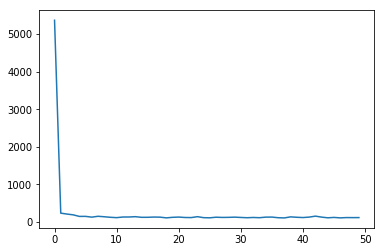

In [9]:
plt.plot(range(len(losses)), losses)

In [10]:
W2.value

array([[ 6.21995722],
       [ 8.17686475],
       [ 5.77763835],
       [ 6.80566872],
       [14.53510194],
       [ 8.19204634],
       [ 6.64423872],
       [ 9.63037265],
       [10.59204368],
       [ 5.13821794]])

In [11]:
X_ = data['data']

In [12]:
X_[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

## 使用Keras - TensorFlow进阶版进行分析

> TensorFlow练习
- [TensorFLow Official Github](https://github.com/tensorflow/examples/tree/master/courses/udacity_deep_learning)

> Keras先学知识
- [Keras Official Documentation](https://keras.io/getting-started/sequential-model-guide/)

In [14]:
import keras

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow.python.framework'

In [32]:
X_[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [47]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(units=64, activation='sigmoid', input_dim=13))
model.add(Dense(units=30, activation='sigmoid', input_dim=64))
model.add(Dense(units=1))

model.compile(loss='mse',
              optimizer='sgd',
              metrics=['mse'])

In [48]:
model.fit(X_, y_, epochs=5000, batch_size=32)

Epoch 1/5000
506/506 [==============================] - 0s 482us/step - loss: 143.4432 - mean_squared_error: 143.4432
Epoch 2/5000
506/506 [==============================] - 0s 42us/step - loss: 82.3686 - mean_squared_error: 82.3686
Epoch 3/5000
506/506 [==============================] - 0s 42us/step - loss: 77.3528 - mean_squared_error: 77.3528
Epoch 4/5000
506/506 [==============================] - 0s 41us/step - loss: 76.8472 - mean_squared_error: 76.8472
Epoch 5/5000
506/506 [==============================] - 0s 50us/step - loss: 75.8336 - mean_squared_error: 75.8336
Epoch 6/5000
506/506 [==============================] - 0s 50us/step - loss: 78.7476 - mean_squared_error: 78.7476
Epoch 7/5000
506/506 [==============================] - 0s 40us/step - loss: 79.6914 - mean_squared_error: 79.6914
Epoch 8/5000
506/506 [==============================] - 0s 45us/step - loss: 78.6502 - mean_squared_error: 78.6502
Epoch 9/5000
506/506 [==============================] - 0s 52us/step - loss: 

506/506 [==============================] - 0s 62us/step - loss: 85.3288 - mean_squared_error: 85.3288
Epoch 142/5000
506/506 [==============================] - 0s 49us/step - loss: 85.0092 - mean_squared_error: 85.0092
Epoch 143/5000
506/506 [==============================] - 0s 64us/step - loss: 85.2259 - mean_squared_error: 85.2259
Epoch 144/5000
506/506 [==============================] - 0s 80us/step - loss: 85.1957 - mean_squared_error: 85.1957
Epoch 145/5000
506/506 [==============================] - 0s 66us/step - loss: 85.4370 - mean_squared_error: 85.4370
Epoch 146/5000
506/506 [==============================] - 0s 56us/step - loss: 85.3190 - mean_squared_error: 85.3190
Epoch 147/5000
506/506 [==============================] - 0s 56us/step - loss: 85.7632 - mean_squared_error: 85.7632
Epoch 148/5000
506/506 [==============================] - 0s 61us/step - loss: 84.8774 - mean_squared_error: 84.8774
Epoch 149/5000
506/506 [==============================] - 0s 55us/step - loss: 

506/506 [==============================] - 0s 60us/step - loss: 84.9341 - mean_squared_error: 84.9341
Epoch 282/5000
506/506 [==============================] - 0s 64us/step - loss: 85.3827 - mean_squared_error: 85.3827
Epoch 283/5000
506/506 [==============================] - 0s 85us/step - loss: 85.2546 - mean_squared_error: 85.2546
Epoch 284/5000
506/506 [==============================] - 0s 71us/step - loss: 85.3267 - mean_squared_error: 85.3267
Epoch 285/5000
506/506 [==============================] - 0s 63us/step - loss: 84.6884 - mean_squared_error: 84.6884
Epoch 286/5000
506/506 [==============================] - 0s 61us/step - loss: 84.8015 - mean_squared_error: 84.8015
Epoch 287/5000
506/506 [==============================] - 0s 74us/step - loss: 85.5370 - mean_squared_error: 85.5370
Epoch 288/5000
506/506 [==============================] - 0s 49us/step - loss: 84.8321 - mean_squared_error: 84.8321
Epoch 289/5000
506/506 [==============================] - 0s 46us/step - loss: 

506/506 [==============================] - 0s 55us/step - loss: 85.0753 - mean_squared_error: 85.0753
Epoch 422/5000
506/506 [==============================] - 0s 61us/step - loss: 84.9265 - mean_squared_error: 84.9265
Epoch 423/5000
506/506 [==============================] - 0s 61us/step - loss: 84.6310 - mean_squared_error: 84.6310
Epoch 424/5000
506/506 [==============================] - 0s 47us/step - loss: 85.5256 - mean_squared_error: 85.5256
Epoch 425/5000
506/506 [==============================] - 0s 67us/step - loss: 85.1650 - mean_squared_error: 85.1650
Epoch 426/5000
506/506 [==============================] - 0s 70us/step - loss: 84.7339 - mean_squared_error: 84.7339
Epoch 427/5000
506/506 [==============================] - 0s 53us/step - loss: 85.3687 - mean_squared_error: 85.3687
Epoch 428/5000
506/506 [==============================] - 0s 51us/step - loss: 85.2038 - mean_squared_error: 85.2038
Epoch 429/5000
506/506 [==============================] - 0s 59us/step - loss: 

506/506 [==============================] - 0s 53us/step - loss: 84.6124 - mean_squared_error: 84.6124
Epoch 562/5000
506/506 [==============================] - 0s 58us/step - loss: 84.9155 - mean_squared_error: 84.9155
Epoch 563/5000
506/506 [==============================] - 0s 66us/step - loss: 83.9864 - mean_squared_error: 83.9864
Epoch 564/5000
506/506 [==============================] - 0s 58us/step - loss: 85.3675 - mean_squared_error: 85.3675
Epoch 565/5000
506/506 [==============================] - 0s 54us/step - loss: 85.5496 - mean_squared_error: 85.5496
Epoch 566/5000
506/506 [==============================] - 0s 48us/step - loss: 85.0878 - mean_squared_error: 85.0878
Epoch 567/5000
506/506 [==============================] - 0s 46us/step - loss: 84.9054 - mean_squared_error: 84.9054
Epoch 568/5000
506/506 [==============================] - 0s 65us/step - loss: 84.8235 - mean_squared_error: 84.8235
Epoch 569/5000
506/506 [==============================] - 0s 61us/step - loss: 

506/506 [==============================] - 0s 66us/step - loss: 85.0464 - mean_squared_error: 85.0464
Epoch 702/5000
506/506 [==============================] - 0s 75us/step - loss: 85.1333 - mean_squared_error: 85.1333
Epoch 703/5000
506/506 [==============================] - 0s 63us/step - loss: 84.9138 - mean_squared_error: 84.9138
Epoch 704/5000
506/506 [==============================] - 0s 55us/step - loss: 86.4281 - mean_squared_error: 86.4281
Epoch 705/5000
506/506 [==============================] - 0s 59us/step - loss: 85.3473 - mean_squared_error: 85.3473
Epoch 706/5000
506/506 [==============================] - 0s 66us/step - loss: 84.4789 - mean_squared_error: 84.4789
Epoch 707/5000
506/506 [==============================] - 0s 59us/step - loss: 85.0255 - mean_squared_error: 85.0255
Epoch 708/5000
506/506 [==============================] - 0s 73us/step - loss: 85.2653 - mean_squared_error: 85.2653
Epoch 709/5000
506/506 [==============================] - 0s 60us/step - loss: 

506/506 [==============================] - 0s 44us/step - loss: 85.5057 - mean_squared_error: 85.5057
Epoch 842/5000
506/506 [==============================] - 0s 69us/step - loss: 85.2541 - mean_squared_error: 85.2541
Epoch 843/5000
506/506 [==============================] - 0s 85us/step - loss: 85.0925 - mean_squared_error: 85.0925
Epoch 844/5000
506/506 [==============================] - 0s 59us/step - loss: 85.0701 - mean_squared_error: 85.0701
Epoch 845/5000
506/506 [==============================] - 0s 65us/step - loss: 85.4431 - mean_squared_error: 85.4431
Epoch 846/5000
506/506 [==============================] - 0s 52us/step - loss: 84.5982 - mean_squared_error: 84.5982
Epoch 847/5000
506/506 [==============================] - 0s 51us/step - loss: 85.2270 - mean_squared_error: 85.2270
Epoch 848/5000
506/506 [==============================] - 0s 82us/step - loss: 84.3814 - mean_squared_error: 84.3814
Epoch 849/5000
506/506 [==============================] - 0s 77us/step - loss: 

KeyboardInterrupt: 

[Kaggle Toxic Text Classification Example Learnboard](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/leaderboard)

Reference1: https://www.kaggle.com/eashish/bidirectional-gru-with-convolution

Keras - Bidirectional LSTM baseline ( lb 0.069)

Reference2:  https://www.kaggle.com/yekenot/textcnn-2d-convolution

TextCNN 2D Convolution

Reference3:  https://www.kaggle.com/ogrellier/wordbatch-fm-ftrl-using-mse-lb-0-9804

FM_FTRL

## 激活函数表达式

1.Softmax: $\frac{1}{1+e^{-x}}$

2.Relu:
$$ f(x)=\left\{
\begin{aligned}
0 & & x<0 \\
x & & x>=0
\end{aligned}
\right.
$$

3.Leaky Relu: max(0.1x, x)

4.tanh: tanh(x) = $\frac{sinh(x)}{cosh(x)}$ = $\frac{e^x - e^{-x}}{e^x + e^{-x}}$

5.Swish: $\frac{x}{1+e^{-x}}$

> 目前Swish表现最好，Softmax其次，Relu最快

Reference: 
- [一文概览深度学习中的激活函数](https://www.jiqizhixin.com/articles/2017-11-02-26)

- [什么是多层感知器和反向传播？](https://mp.weixin.qq.com/s?__biz=MzA3MzI4MjgzMw==&mid=2650720758&idx=1&sn=3004c425e0d427f4900a182d74bed31d&chksm=871b0d88b06c849e951469ae1ed54e5f66074d6322eb6681c85727bb8199154709c04c48c034&scene=21#wechat_redirect)

## 优化方法比较

Karpathy做了一个这几个方法在MNIST上性能的比较，其结论是： 
- adagrad相比于sgd和momentum更加稳定，即不需要怎么调参。
- 而精调的sgd和momentum系列方法无论是收敛速度还是precision都比adagrad要好一些。
- 在精调参数下，一般Nesterov优于momentum优于sgd。
- 而adagrad一方面不用怎么调参，另一方面其性能稳定优于其他方法。

> 总之，Adagrad和Nesterov最好

[Reference: 优化器比较](https://blog.csdn.net/blue_jjw/article/details/50650248)